<a href="https://colab.research.google.com/github/ele9996/Alexnet-with-Caltech101-dataset/blob/master/HMW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Esercizio 3

In [1]:
import networkx as nx
import numpy as np
G = nx.Graph()

In [2]:
G.add_node("Castellani")
G.add_node("Barbadori")
G.add_node("Acciaiuoli")
G.add_node("Salviati")
G.add_node("Pazzi")
G.add_node("Ginori")
G.add_node("Lamberteschi")
G.add_node("Guadagni")
G.add_node("Albizzi")
G.add_node("Medici")
G.add_node("Ridolfi")
G.add_node("Tornabuoni")
G.add_node("Bischeri")
G.add_node("Strozzi")
G.add_node("Barbadori")
print(G.nodes)

['Castellani', 'Barbadori', 'Acciaiuoli', 'Salviati', 'Pazzi', 'Ginori', 'Lamberteschi', 'Guadagni', 'Albizzi', 'Medici', 'Ridolfi', 'Tornabuoni', 'Bischeri', 'Strozzi']


In [3]:
G.add_edge("Castellani", "Peruzzi")
G.add_edge("Castellani", "Strozzi")
G.add_edge("Castellani", "Barbadori")
G.add_edge("Peruzzi","Bischeri")
G.add_edge("Peruzzi", "Strozzi")
G.add_edge("Strozzi", "Bischeri")
G.add_edge("Strozzi", "Ridolfi")
G.add_edge("Ridolfi", "Medici")
G.add_edge("Barbadori", "Medici")
G.add_edge("Bischeri", "Guadagni")
G.add_edge("Tornabuoni", "Medici")
G.add_edge("Tornabuoni", "Guadagni")
G.add_edge("Medici", "Acciaiuoli")
G.add_edge("Medici", "Salviati")
G.add_edge("Medici", "Albizzi")
G.add_edge("Guadagni", "Lamberteschi")
G.add_edge("Guadagni", "Albizzi")
G.add_edge("Albizzi", "Ginori")
G.add_edge("Salviati", "Pazzi")

print("Edges:", G.edges)

Edges: [('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Barbadori', 'Medici'), ('Acciaiuoli', 'Medici'), ('Salviati', 'Medici'), ('Salviati', 'Pazzi'), ('Ginori', 'Albizzi'), ('Lamberteschi', 'Guadagni'), ('Guadagni', 'Bischeri'), ('Guadagni', 'Tornabuoni'), ('Guadagni', 'Albizzi'), ('Albizzi', 'Medici'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Ridolfi', 'Strozzi'), ('Bischeri', 'Peruzzi'), ('Bischeri', 'Strozzi'), ('Strozzi', 'Peruzzi')]


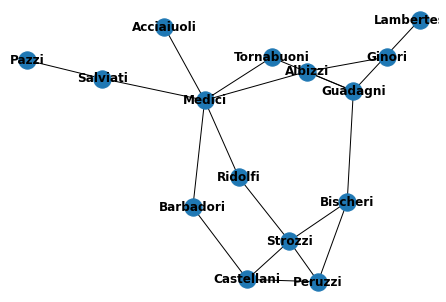

In [4]:
nx.draw(G, with_labels=True, font_weight='bold')

{'Castellani': 0, 'Barbadori': 1, 'Acciaiuoli': 2, 'Salviati': 3, 'Pazzi': 4, 'Ginori': 5, 'Lamberteschi': 6, 'Guadagni': 7, 'Albizzi': 8, 'Medici': 9, 'Ridolfi': 10, 'Tornabuoni': 11, 'Bischeri': 12, 'Strozzi': 13, 'Peruzzi': 14}


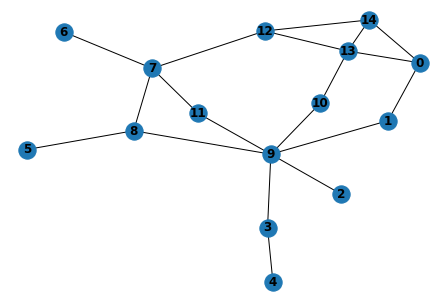

In [5]:
#node indexing 
name_num_corresp={}
i=0

for node in G.nodes:
  name_num_corresp[node]=i
  i+=1

print(name_num_corresp)
G = nx.relabel_nodes(G, name_num_corresp, copy=False)
nx.draw(G, with_labels=True, font_weight='bold')

In [6]:
W = nx.adjacency_matrix(G)
W = W.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

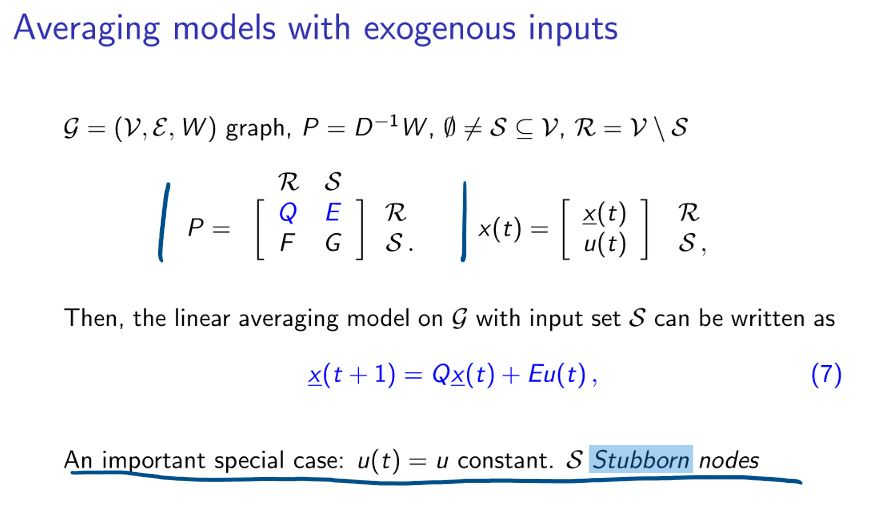




In [18]:
iterations=50

stubb_nodes = {9:1, 13:-1}
stub_id=list(stubb_nodes.keys())

regular_id = [node for node in G.nodes if node not in stub_id]
Q = P[np.ix_(regular_id, regular_id)]
E = P[np.ix_(regular_id, stub_id)]


# Sample a random initial condition for regular nodes
ic = np.random.uniform(0,1,len(regular_id))

# Set the initial condition for the dynamics
x = np.zeros((G.number_of_nodes(),iterations))
x[stub_id,0] = list(stubb_nodes.values());
x[regular_id,0] = ic;
print("Initial condition:", x[:,0])


Initial condition: [ 0.39964335  0.59973281  0.33476254  0.6326859   0.81761124  0.58210074
  0.25294194  0.91001212  0.38116022  1.          0.5679629   0.45824368
  0.87460036 -1.          0.61099106]


In [21]:
# Evolve the opinion vector
for t in range(1,iterations):
    x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stub_id, t-1]
    x[stub_id, t] = x[stub_id, t-1];

x_final = x[:,iterations-1]

for key in name_num_corresp.keys():
    print(key, x_final[name_num_corresp[key]])

Castellani -0.9999999039774502
Barbadori -0.4648967679193341
Acciaiuoli -0.33036829774972754
Salviati -0.5584254475650117
Pazzi -0.5034476253158788
Ginori -0.7788313761739075
Lamberteschi -0.4651479248748841
Guadagni 0.06877228575716435
Albizzi -0.6237959179519545
Medici 1.0
Ridolfi -0.8115254614372176
Tornabuoni -1.0
Bischeri 0.06917204583702266
Strozzi -1.0
Peruzzi -0.9999999582873778
